# Week 2: A Data Scientist's most fundamental tools

Today's exercises will be related to chapters 3, 4, 5 from DSFS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code.

The exercises today cover:
* Basic visualization
* Linear algebra
* Statistics

**Advice**: Some of you may be new to solving problems using code. You may be wondering *what level of detail* I expect in your solutions, your code comments and explanations. **This is the guideline:** Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote (probably) Einstein: *"Make everything as simple as possible, but not simpler"*. Finally, when you optimize for your own future comprehension, other people will be able to understand what you did.

## Exercises

### Part 1: Visualization (DSFS Chapter 3)

Consult the [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) tutorial as needed.

>**Ex. 2.1.1 SOLVED**: The figure below meets the minumum style requirements which I expect the figures you make in this class (and life in general) should also meet:
* Figure sizing. Try to make the aspect ratio close to 4:3.
* Axis labels. Note that you may want to alter the `fontsize` to make them look nice.
* Properly sized x and y tick labels.
* Title (optional: not always necessary, but oftens helps the reader)
* Legend (general rule: only use if you have multiple trends so reader can distinguish).
>
> Your task in this exercise if to reproduce this figure (perfect match not required).
>
>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`. For pointers on how to make plots like this in Python, check out the textbook or Google something like "scatter plot python" and see if you can find some examples of how other people do this.*

![img](https://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.1.1.png)

Make sure you understand the code!

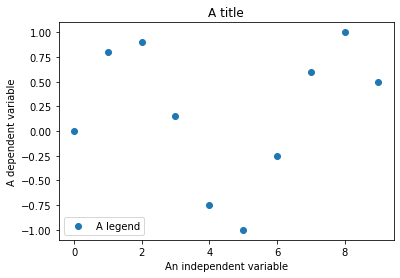

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
indep_var = range(10)
dep_var = [0, 0.8, 0.9, 0.15, -0.75, -1, -0.25, 0.6, 1, 0.5]

plt.scatter(indep_var, dep_var)
plt.title("A title")
plt.xlabel("An independent variable")
plt.ylabel("A dependent variable")
plt.legend (["A legend"], loc=3)
plt.show()

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`. First, make sure you understand the code.  Then: 
1. Make a scatter plot of `x` vs. `y` for the "blackmirror" subreddit (**remember** what you learned in the previous exercise about **styling**). Comment on what you see.
2. Maybe you've noticed that it looks pretty bad right, in the sense that lots of points are close to each other while a few are far away from the rest? That's because the data does *not scale linearly*! This is a very common thing. To visualize it you should then try to *transform* it somehow. In this case, the data scales *exponentially* in both the x and y direction. Which transformation should we use to make it look linear?
3. In two separate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news" (you can use [subplots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html), for example, to plot two figures sideby side). Remember to transform the data. When I solved this exercise a while back, my figure looked like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Interpret and comment on any differences you see between the two plots. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" in point 2 and 3 above, I mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [3]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("blackmirror", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_t10ht0
Retrieved 25 posts from page t3_suehya
Retrieved 25 posts from page t3_snbpsj
Retrieved 25 posts from page t3_sg0osr
Retrieved 25 posts from page t3_sa335l
Retrieved 25 posts from page t3_s5il14
Retrieved 25 posts from page t3_s2sw25
Retrieved 25 posts from page t3_rtxu96
Retrieved 25 posts from page t3_rqljaq
Retrieved 25 posts from page t3_rmcr8b
Retrieved 25 posts from page t3_ri5dd4
Retrieved 25 posts from page t3_re7qhl
Retrieved 25 posts from page t3_r82r2m
Retrieved 25 posts from page t3_r3a8jt
Retrieved 25 posts from page t3_qzkyc9
Retrieved 25 posts from page t3_qrqbf9
Retrieved 25 posts from page t3_qizz2z
Retrieved 25 posts from page t3_qbtwbe
Retrieved 25 posts from page t3_q5dz3g


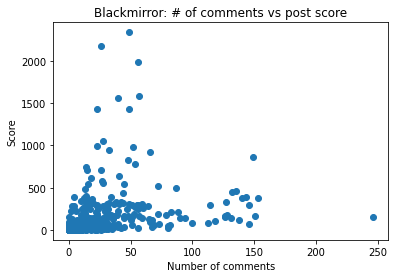

In [4]:
#Answer to 2.1.2.1
from matplotlib import pyplot as plt
import numpy as np

#To get figures to display in the notebook
%matplotlib inline

#Set independent and dependent variables
var_indep_blk = x
var_dep_blk = y

#Create the scatterplot and add labels
plt.scatter(var_indep_blk, var_dep_blk)
plt.title("Blackmirror: # of comments vs post score")
plt.xlabel("Number of comments")
plt.ylabel("Score")

#Show the scatterplot
plt.show()


/tmp/ipykernel_147/3701067122.py:10: RuntimeWarning: divide by zero encountered in log
  var_indep_blk = np.log(x)
/tmp/ipykernel_147/3701067122.py:11: RuntimeWarning: divide by zero encountered in log
  var_dep_blk = np.log(y)


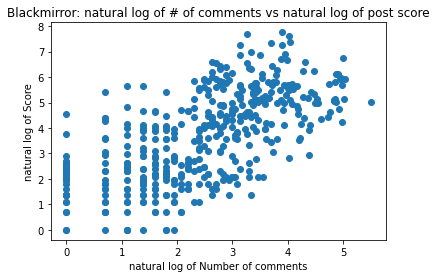

In [3]:
#Answer to 2.1.2.2
from matplotlib import pyplot as plt
import numpy as np
#Since the data is exponential for both axis, we should take the natural log
#to counteract this issue. Unfourtunately, since some posts have no comments,
#and some posts also have no score, this means that any post with no comments 
#or score will not be valid in our calculations, since the natural log of 0 
#is negative infinity. 

#Create new lists to take the natural log of each point's x and y coordinate
var_indep_blk = np.log(x)
var_dep_blk = np.log(y)

#Create a new scatterplot to reflect the adjustment
plt.scatter(var_indep_blk, var_dep_blk)
plt.title("Blackmirror: natural log of # of comments vs natural log of post score")
plt.xlabel("natural log of Number of comments")
plt.ylabel("natural log of Score")

#Show the scatterplot
plt.show()

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_t4xlru
Retrieved 25 posts from page t3_t52yug
Retrieved 25 posts from page t3_t56zlc
Retrieved 25 posts from page t3_t4h4es
Retrieved 25 posts from page t3_t4jfq4
Retrieved 25 posts from page t3_t3p2ze
Retrieved 25 posts from page t3_t2x1s5
Retrieved 25 posts from page t3_t2owbi
Retrieved 25 posts from page t3_t29hfw
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_t4xlru
Retrieved 25 posts from page t3_t52yug
Retrieved 25 posts from page t3_t56zlc
Retrieved 25 posts from page t3_t4h4es
Retrieved 25 posts from page t3_t4jfq4
Retrieved 25 posts from page t3_t3p2ze
Retrieved 25 posts from page t3_t2x1s5
Retrieved 25 posts from page t3_t2owbi
Retrieved 25 posts from page t3_t29hfw


/tmp/ipykernel_145/2296626351.py:13: RuntimeWarning: divide by zero encountered in log
  var_indep_news = np.log(x_news)


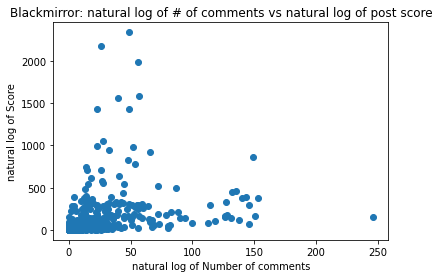

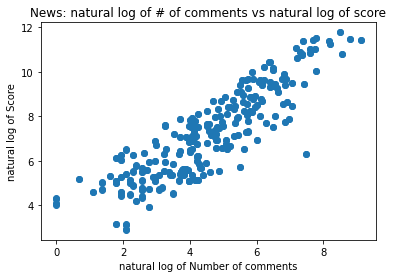

In [5]:
#Answer to 2.1.2.3
from matplotlib import pyplot as plt
import numpy as np

#Get the data from news. We will use the get_x_y function defined above, and 
#continue to use the same x_log, y_log variables for the Blackmirror data
x_news, y_news = get_x_y("news", 500, count=25)

#To get figures to display in the notebook
%matplotlib inline

#Set independent and dependent variables
var_indep_news = np.log(x_news)
var_dep_news = np.log(y_news)

#Create the scatterplots and add labels or each
plt.subplots()
plt.scatter(var_indep_blk, var_dep_blk)
plt.title("Blackmirror: natural log of # of comments vs natural log of post score")
plt.xlabel("natural log of Number of comments")
plt.ylabel("natural log of Score")

plt.subplots()
plt.scatter(var_indep_news, var_dep_news)
plt.title("News: natural log of # of comments vs natural log of score")
plt.xlabel("natural log of Number of comments")
plt.ylabel("natural log of Score")

#Show the new scatterplots
plt.show()


#Answer to 2.1.2.4

In r/news, the posts are all recent and people are more likely to get in, give their
two cents, and leave. There is plenty of news to look at, so people are less likely to
hang around. With Blackmirror it it possible there are more people who could be sifting 
through old posts, unlike news which is less likely to have people combing through old 
posts.


>**Ex. 2.1.3**: There is clearly a huge level unevenness in the distribution of likes and comments given to different posts. Let's visualize this using histograms!
1. Log transform `y` (e.g. create a new variable called `y_transformed`) and input it to `plt.hist`. Notice that if there are zeros in `y`, `np.log` will convert them to `-inf`, which `plt.hist` can't handle. You should therefore remove zeros before log transforming. When you have done this, execute `hist_output = plt.hist(y_transformed)`. This should produce a histogram. But what does the variable `hist_output` contain?  Check out [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html).
2. OPTIONAL. Use the contents of `hist_output` to make a similar histogram with the `plt.bar` plotting function. I make you do this to force into your permanent memory what a histogram is: a bar chart showing counts within intervals/bins. (Many students get stuck on this question.  If you spend more than 5 minutes on this, leave it for now and return to it later.)
3. Plot the distributions of `y_transformed` for "blackmirror" and "news" as histograms, side by side (you can just use the regular `plt.hist` function here). My figure looked like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png). Interpret/comment on the result.

<class 'tuple'>


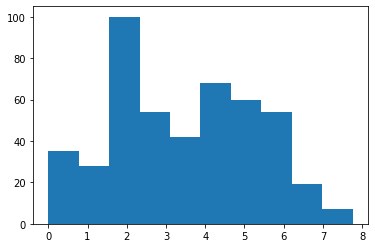

In [6]:
#Answer to 2.1.3.1
from matplotlib import pyplot as plt
import numpy as np

#Remove 0s first, since they won't work in a histogram
y = [i for i in y if i != 0]

#Apply the natural log to our copy
y_transformed = np.log(y)

#According to the documentation, this variable will contain a tuple with all the data
hist_output = plt.hist(y_transformed)
print(type(hist_output))



"\nThe histogram for news shows more collelation between the number of comments \nand the score of a given post, as we saw from the graph. The blackmirror \nsubreddit doesn't seem to show any significant correlation between the score\nof a post and the number of comments associated with it.\n"

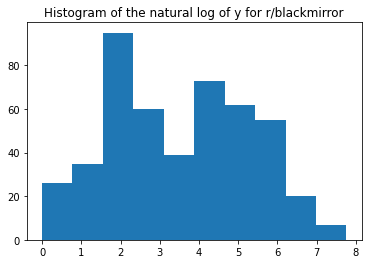

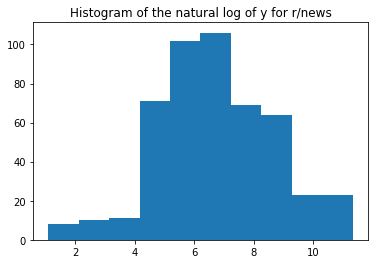

In [10]:
#Answer to 2.1.3.3
from matplotlib import pyplot as plt
import numpy as np

#Remove 0s first for each dataset, since they won't work in a histogram
y = [i for i in y if i != 0]
y_news = [j for j in y_news if j != 0]

#Apply the natural log to our copies
y_transformed = np.log(y)
y_news_transformed = np.log(y_news)

#Create a histogram for each dataset
plt.subplots()
plt.hist(y_transformed)
plt.title("Histogram of the natural log of y for r/blackmirror")

plt.subplots()
plt.hist(y_news_transformed)
plt.title("Histogram of the natural log of y for r/news")

"""
The histogram for news shows more collelation between the number of comments 
and the score of a given post, as we saw from the graph. The blackmirror 
subreddit doesn't seem to show any significant correlation between the score
of a post and the number of comments associated with it.
"""


### Part 2: Linear algebra (DSFS Chapter 4)

>**Ex. 2.2.1**: What does Joel (book) mean when he uses the word *vector*? What are [Grant Sanderson](https://youtu.be/fNk_zzaMoSs)'s vector definitions from the perspectives of the Physicist, the Computer Scientist and the Mathematician, respectively?

#Answer to 2.2.1
The book defines a vector as an object that can be added to other vectors to form objects
that can be multiplied by scalers to also create new objects. From Sanderson's video, in a physics 
context a vector is an arrow pointing with space, which has a lenth and direction associated wtih it.
In a computer science context a vector is a list of numbers. The video shares a similiar view to the 
textbook when dealing with vectors in a math context; vectors are objects that can be added and scaled,
and have a standard method of doing so. 

>**Ex. 2.2.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (dot product)
5. `[3, 8, 0] x [6, 1, 0]` (cross product)

In [1]:
import numpy as np

a = np.array([2, 3])
b1, b2, b1_3d, b2_3d = np.array([3, 8]), np.array([6, 1]), np.array([3, 8, 0]), np.array([6, 1, 0])

#Answer to 2.2.2.1
answer_one = a * 2

#Answer to 2.2.2.2
answer_two = np.add(b1, b2)

#Answer to 2.2.2.3
answer_three = b1 * b2

#Answer to 2.2.2.4
answer_four = np.dot(b1, b2)

#Answer to 2.2.2.5
answer_five = np.cross(b1_3d, b2_3d)

print(answer_one)
print(answer_two)
print(answer_three)
print(answer_four)
print(answer_five)


[4 6]
[9 9]
[18  8]
26
[  0   0 -45]


>**Ex. 2.2.3**: Say you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

#Answer to 2.2.3

A small dot product implies that the two vectors in question are not close in direction(if it is zero the two vectors are perpendicular), whereas a large dot product implies they point in a similar direction. The larger the dot product, they closer together they are. The can therefore be seen as a way to measure the relative direction between two vectors.

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. If we have $N$ data points each with $M$ features to them, we can represent this data using an $N \times M$ matrix, that is a matrix that has $N$ rows, one for each datapoint, and $M$ columns, one for each feature. Below I fetch a dataset of wines (rows) and their features (columns).

In [4]:
import pandas as pd

# Download dataset
X = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv").drop('Wine', axis=1)

# Display dataset
X.head(10)

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

>So this dataset has $N=178$ rows and $M=13$ columns. Let's start by finding the so-called *covariance matrix* of the features. It is a square, in this case, $13\times13$ matrix where every value $i,j$ represents the covariance between features $i$ and $j$. [Read more here](https://en.wikipedia.org/wiki/Covariance_matrix).
1. Use the `np.cov` method on this data to get the $13 \times 13$ covariance matrix.
2. Do you notice any characteristics of how values are organized in this matrix? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.
4. Plot the distribution of correlations in the same way. Comment on the differences between these two plots. Is one easier to interpret than the other?
>
>*Hint for 1: `np.cov` expects that rows are features and columns are observations. That is the transpose of how `X` 
is represented now.*<br>
>*Hint for 3: DO NOT just do something like `plt.hist(my_cov_matrix)`, as this will result in something completely different than what we are after (and not particularly meaningful).  Instead, use the covariance matrix to create a vector in which you keep all the distinct covariances.* <br>
>*Hint for 4: The correlation matrix can be obtained with the `np.corrcoef` function.*

In [5]:
#Answer to 2.2.4.1
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

#Create a numpy array from the initial data
data_vector = np.array(X)

#Use the np.cov method to get covariance
X_cov = np.cov(data_vector.T)

#Output the result
print(X_cov)

[[ 6.59062328e-01  8.56113090e-02  4.71151590e-02 -8.41092903e-01
   3.13987812e+00  1.46887218e-01  1.92033222e-01 -1.57542595e-02
   6.35175205e-02  1.02828254e+00 -1.33134432e-02  4.16978226e-02
   1.64567185e+02]
 [ 8.56113090e-02  1.24801540e+00  5.02770393e-02  1.07633171e+00
  -8.70779534e-01 -2.34337723e-01 -4.58630366e-01  4.07333619e-02
  -1.41146982e-01  6.44838183e-01 -1.43325638e-01 -2.92447483e-01
  -6.75488666e+01]
 [ 4.71151590e-02  5.02770393e-02  7.52646353e-02  4.06208278e-01
   1.12293658e+00  2.21455913e-02  3.15347299e-02  6.35847140e-03
   1.51557799e-03  1.64654327e-01 -4.68215451e-03  7.61835841e-04
   1.93197391e+01]
 [-8.41092903e-01  1.07633171e+00  4.06208278e-01  1.11526862e+01
  -3.97476036e+00 -6.71149146e-01 -1.17208281e+00  1.50421856e-01
  -3.77176220e-01  1.45024186e-01 -2.09118054e-01 -6.56234368e-01
  -4.63355345e+02]
 [ 3.13987812e+00 -8.70779534e-01  1.12293658e+00 -3.97476036e+00
   2.03989335e+02  1.91646988e+00  2.79308703e+00 -4.55563385e-01


#Answer to 2.2.4.2

The values are arranged in a 13x13 python array. I also noticed that they all have scientific notation attatched to the end of each number, and most values are multiplied by between 10^-2 and 10^2

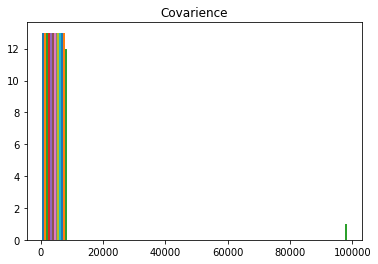

In [7]:
#Answert to 2.2.4.3
from matplotlib import pyplot as plt
import numpy as np

#Create a histogram of the covarience data
plt.hist(X_cov)
plt.title("Covarience")

#Show the histogram
plt.show()

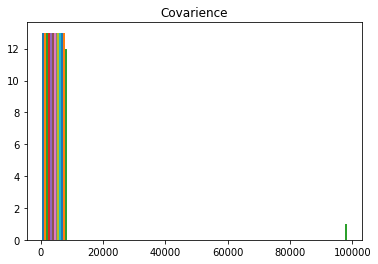

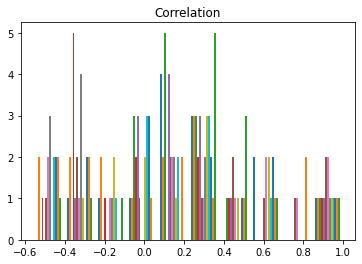

'\nThe correlatin graph appears easier to work with, especially since the covarience has a clear\noutlier. The correlation graph seems to show much more detail, though no trends appear here either. \n'

In [36]:
#Answer to 2.2.4.4
from matplotlib import pyplot as plt
import numpy as np

#Create a histogram of the covarience data
plt.subplots()
plt.hist(X_cov)
plt.title("Covarience")

#Caltulate the correlation data
X_cor = np.corrcoef(data_vector.T)

#Create a histogram of the correlation data
plt.subplots()
plt.hist(X_cor)
plt.title("Correlation")

#Show the histograms
plt.show()

#Addition answer from the question
"""
The correlatin graph appears easier to work with, especially since the covarience has a clear
outlier. The correlation graph seems to show much more detail, though no trends appear here either. 
"""

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on `X`.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

>1. Explain what the matrix you get when you call `pca.components_` means.  Read about the `components_` attribute (run `?pca` in a code cell and then look under "Attributes").
2. Make a bar plot of `pca.explained_variance_ratio_` and explain what it means (you may want to log-scale the y-axis). What insights about our data can we extract from this?
3. Indeed, problem with the data AS-IS, is that the different features have very different variances (some are huge numbers others are small). The way to fix this is by doing something called "[zscoring](https://en.wikipedia.org/wiki/Standard_score)", whereby each feature is rescaled to have zero mean and unit standard deviation. In this way, all of the data ends up with comparable variance. Make a new array `X_z` that is the zscored `X`, using the `scipy.stats.zscore` function. Show that each column has zero mean and unit standard deviation.
4. Transform `X` using the PCA we fitted above to create a new array `X_pca`. Then fit a new PCA to `X_z` and transform it to create another new array `X_z_pca`. Finally, scatter plot against each other the first two components (i.e. fitst two columns in array) of `X_pca`. Do the same for `X_z_pc`. Comment on the difference.

>*Hint for 4: use `pca.transform` or `pca.fit_transform`. Understand the difference between the two.*

In [7]:
#Answer to 2.2.5.1
from sklearn.decomposition import PCA

#Create a new variablet to hold the results of running pcs.componenets_
array = pca.components_

#Print the array
print(array)

"""
This array contains the eigenvectors for our projection space, one for each of the principal components.
"""

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [-1.68738094e-02 -1.22003373e-01 -5.19874304e-02 -9.38593003e-01
   2.97802484e-02  4.04846439e-02  8.54433387e-02 -1.35107797e-02
   2.46593824e-02 -2.91398464e-01  2.59776624e-02  7.03239693e-02
  -4.52868159e-03]
 [-1.41446778e-01 -1.60389543e-01  9.77280992e-03  3.30965260e-01
   5.39375605e-03  7.45846556e-02  1.69086724e-01 -1.08055610e-02
   5.01209524e-02 -8.78893693e-01  6.00349446e-02  1.78200254e-01
   3.11291570e-03]
 [ 2.03369773e-02 -6.12883454e-01  2.01755752e-02  6.43523403e-02
  -6.14934472e-03  3.15245063e-01  5.24761088e-01 -2.96475124e-02


'\nThis array contains the eigenvectors for our projection space, one for each of the principal components.\n'

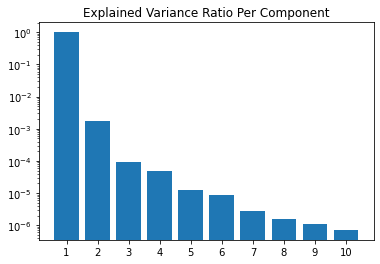

In [11]:
#Answer to 2.2.5.2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

#Get the percentages of explained variance
variance_raito_list = pca.explained_variance_ratio_

#Create an array of scaled x's
x = [x+1 for x in range(len(variance_raito_list))]

pca.explained_variance_ratio_.flatten()

#Create a bar graph with the values from pca.explained_variance_ratio_
plt.xticks(x)
plt.bar(x, height = variance_raito_list, log = True)
plt.title("Explained Variance Ratio Per Component")

#Show the graph
plt.show()

In [15]:
#Answer to 2.2.5.3(with help from fellow students)
from scipy import stats
import numpy as np

#First take the z-scores of x
x_zscores = np.array(stats.zscore(X))

#Take the mean of each column
columns_means = x_zscores.mean(axis = 0)

#Find the standard deviation of each column
columns_sd = x_zscores.std(axis=0)

#Print the results
print("Means = ", columns_means)
print("Standard deviations = ", columns_sd)

Means =  [-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  2.49488320e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
Standard deviations =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
#Answer to 2.2.5.4


x_pca = pca.transform(X) 
x_zscore_pca = pca.fit_transform(x_zscores)

### Part 3: Statistics (DSFS Chapter 5)

>**Ex. 2.3.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

In [2]:
#Answer to 2.3.1.1
import numpy as np

#Set a[] according to the question
a = np.array([1, 3, 2, 5, 3, 1, 5, 1, 9000])

#Compute the mean
a_mean = np.mean(a)

#print the result
print(a_mean)

1002.3333333333334


In [18]:
#Answer to 2.3.1.2
"""
The median is defined as the value in the middle position of a sorted dataset. If there
are an even number of elements, the median is the average of the two middle elements.
"""

#Compute the median of a[]
a_median = np.median(a)

#Print the result
print(a_median)

3.0


#Answer to 2.3.1.3

The last element of a[] is significantly larger than the rest, and since every element is used to calculate the average this results in a misleading value. The calculation of median doesn't concern the last element, unless it is the only element or only other element.


>**Ex. 2.3.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How do variance and standard deviation relate? Compute them both. Which value is greater?
3. What is the interquartile range? Compute it, and explain why it might be useful.

In [23]:
#Answer to 2.3.2.1
"""
Range is defined as the difference between the largest and smallest values of a given array.
"""

#Compute the range of a[]
a_range = max(a) - min(a)

#Print the result
print(a_range)

8999


In [22]:
#Answer to 2.3.2.2
"Variance is the measure of how far the numbers in a dataset are spread away from the mean."
"Standard deviate is the average amount of variance among the values in the dataset."
a = np.array([1, 3, 2, 5, 3, 1, 5, 1, 9000])

#Compute the variance of a[]
a_variance = np.var(a)

#Computer the standard deviation of a[]
a_sd = np.std(a)

#Print them both
print(a_variance, a_sd)

"The variance is higher than the standard deviation."

7995336.222222224 2827.6025573305424


In [27]:
#Answer to 2.3.2.3
"Interquartile range is the difference between the third and first quartiles"

#Compute the first quartile
a_Q1 = np.percentile(a, 25)

#Computer the third quartile
a_Q3 = np.percentile(a, 75)

#Find the difference to get the interquartile range
a_intrng = a_Q3 - a_Q1

#Print the result
print(a_intrng)

"""
This statistic can be useful becuase, unlike traditional range, the largest and smallest values don't affect it, so
we get a better sense of the range of the data.
"""

4.0


"\nThis statistic can be useful becuase, unlike traditional range, the largest and smallest values don't affect it, so\nwe get a better sense of the range of the data.\n"

>**Ex. 2.3.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What *term* do we use for that last value for both `a` and `b`?

#Answer to 2.3.3.1

Covariance is used to classify the relationship between variables. Correlation is the strength and direction of the relationship. Covarience can also be used to define direction, but not strength.

In [4]:
#Answer to 2.3.3.2

#Define a[] and b[]
a = np.array([1, 3, 2, 5, 3, 1, 5, 1, 9000])
b = np.array([0, 4, 1, 6, 2, 0, 6, 0, 2])

#Compute the correlation for a[] and b[]
ab_corr = np.correlate(a, b)

#Print the result
print(ab_corr)

[18080]


In [6]:
#Answer to 2.3.3.3

#Remove the last element of a[] and b[]
a = np.array([1, 3, 2, 5, 3, 1, 5, 1])
b = np.array([0, 4, 1, 6, 2, 0, 6, 0])

#Find the new correlation
ab_corr_new = np.correlate(a, b)

#Print the result
print(ab_corr_new)

"""
The correlation is now much lower because now the relationship between a[] and b[] is close to a one to one
relationship, as opposed to when there was a clear outlier in a[]. 
"""

[80]


'\nThe correlation is now much lower because now the relationship between a[] and b[] is close to a one to one\nrelationship, as opposed to when there was a clear outlier in a[]. \n'

>**Ex. 2.3.4.EXTRA**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement. I created two lists for you below; you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).
>
>***This exercise will not be included in the assignment. But, you can earn up to 10 extra credit points if you solve it and submit it to the teacher. Your solution must reflect that you have understood the idea of numerical hypothesis testing.***

In [319]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

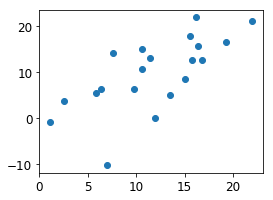

In [320]:
# Why not make a scatter plot here, to see what you're working with?
plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

>1. If you plotted `x` and `y` against each other, you probably noted that it looks like they correlate. Use the method `pearsonr` from `scipy.stats` to **compute the correlation coefficient**. Notice that the method also gives you the p-value of the correlation. For now, we ignore this.
>2. So how do we figure out if this correlation strength is significant? 
The devil's advocate would surely argue, that you could obtain a similar *or stronger* correlation between completely random data.
Well, screw you advocate, because we can SHOW that if you randomize THIS data, the correlation strength is almost always lower!
To put this in stat-lingo, the devil's advocate believes in the so-called *Null Hypothesis*–that your result is no different from random–and the way we REJECT this acvocate's pessimistic hypothesis, is simply by comparing OUR obtained correlation strength to one obtained from data we know is random, namely the *Null model*.
The Null model, in this case just a randomized version of our existing data. 
Your job, now, is to take `x` and `y`, randomize them (each independently) and compute the correlation coefficient.
>3. In 2. you probably found that the correlation coefficient of the Null model was lower than that of your real data.
But that was just one example of the Null hypothesis being wrong.
The devil's advocate is not convinced and wants more evidence.
Compute again the correlation coefficient of the Null model, but do it in a `for` loop 10000 times, and report the fraction of times that this correlation coefficient is greater or equal to the correlation coefficient of your real data.
Maybe it will happen in 0% of randomizaion trials, maybe 2%, but hopefully not more than 5%.
Yes, you guessed, it, this fraction is indeed the p-value.
So is it really significant?
>4. Complete the function below that takes as input `noise_level` and computes a p-value. Let `noise_level` vary between 1 and 50 and plot the p-value as a function of `noise_level` so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) around which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [ ]:
def compute_pval(noise_level, n=10000):

    # Seed random number generator
    np.random.seed(0)
    
    # Generate data
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    
    # Unseed the random number generator
    np.random.seed(None)
    
    # Compute the baseline correlation coefficient
    r_baseline = pearsonr(x, y)[0]
    
    # Code with for loop that computes the p-value by randomizing data and
    # comparing Pearson correlation to baseline. Should correspond to your
    # code from 2.3.4.3.